# SDS Kaggle salary estimation project - 2025
### Q&A
source: https://www.kaggle.com/datasets/chopper53/machine-learning-engineer-salary-in-2024/data

Caveat: 
there is a general salary increase over time but there is significant jump from 2021 to 2022. earlier data there fore discarded from further analysis. 10092-> 9801

#### Questions:  

- What roles or experience levels yield the highest average salary?  
  role: Analytics Engineering Manager	$399880 
  
  exp: EX $195322  
  
- Does remote work correlate with higher or lower salaries?  
  hybrid work pattern pays less across all experience level. there is no difference in job titles ratio between work patterns so that is not a reason.

  there is a logically justified almost linear increase in salary between experience levels  
- Are there differences in salary based on company size or location?  
  company size: medium companies has significantly higher salary average than the second highest large companies (p < 0.05)
  location: North America and Europe shows a marked difference for the North avantage (p-value ***), whie there is a small but significant difference between USA and Canada for the americans (p-value *) an no meaningful difference within Europe (UK vs Denmark).
- How consistent are salaries across similar job titles?  
    no consistency

- Which features most strongly influence salary distribution?ear:  
  Year: irrelevant  
  All of the features has strong influence, the less are employee_residence and company_location.
  
- Do certain job titles or experience levels benefit more from remote work?  
  there is a negative impact on salary with hybrid work.
    
- What is the variance in salaries within the same employment type and company size?  
  There is no reliable comparison can be made as data is underrepresented in employment type.  
    Regarding FT type of employment, medium size compnaies pay better with signifiacant more varicance than the second large or small companies.
  
- Can we identify outlier salary records, and should they be retained or removed?

In [45]:
df.columns[[1,2,3,4,5,6,7]]

Index(['experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def t_test(**kwargs: 'a:[name, data]'):
    """ independent t-test """

    tscore, pvalue = ttest_ind(kwargs['a'][1], kwargs['b'][1])
    
    print('The independent t-score for {a} and {b} is {t} with a p-value of {p}'.format(a=kwargs['a'][0],
                                                                                      b=kwargs['b'][0],
                                                                                      t=tscore,
                                                                                      p=pvalue) )

In [2]:
df = pd.read_csv('salary_clean.csv', index_col=0)
df.shape

(10092, 9)

In [3]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size', 'salary_in_usd'],
      dtype='object')

In [4]:
# check salary change over time
df.work_year.value_counts()

work_year
2023    4632
2024    4053
2022    1116
2021     216
2020      75
Name: count, dtype: int64

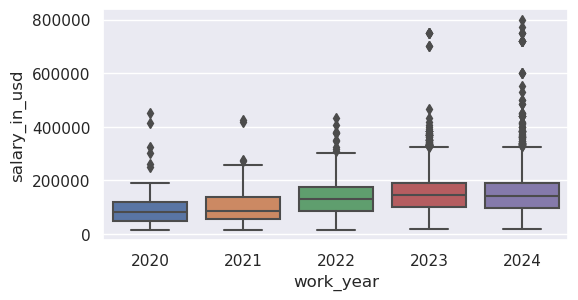

In [5]:
sns.set_theme(rc={'figure.figsize': (6,3)})
sns.boxplot(data=df, x='work_year', y='salary_in_usd');

In [6]:
y21 = df.loc[df.work_year == 2021, 'salary_in_usd']
y22 = df.loc[df.work_year == 2022, 'salary_in_usd']

t_test(a=['year21', y21], b=['year22', y22])

The independent t-score for year21 and year22 is -6.925067332604848 with a p-value of 6.7643836395553875e-12


In [7]:
df = df.loc[df.work_year > 2021]
df.shape

(9801, 9)

In [8]:
# What roles or experience levels yield the highest average salary?
df.groupby('experience_level').agg({'salary_in_usd': 'mean'}).sort_values('salary_in_usd', ascending=False)


,salary_in_usd
experience_level,
EX,195731.541333
SE,163920.438195
MI,125561.736822
EN,93263.818085


In [9]:
df.job_title.unique().size

150

In [10]:
df.groupby('job_title').agg({'salary_in_usd': 'mean'}).sort_values('salary_in_usd', ascending=False).head(5)

,salary_in_usd
job_title,
Analytics Engineering Manager,399880.000000
Data Science Tech Lead,375000.000000
Head of Machine Learning,299758.428571
Managing Director Data Science,260000.000000
AWS Data Architect,258000.000000


In [11]:
# Does remote work correlate with higher or lower salaries?
df.remote_ratio.value_counts(normalize=True)*100

remote_ratio
0      64.554637
100    33.874094
50      1.571268
Name: proportion, dtype: float64

In [12]:
df[['remote_ratio','salary_in_usd']].corr()

,remote_ratio,salary_in_usd
remote_ratio,1.000000,-0.047722
salary_in_usd,-0.047722,1.000000


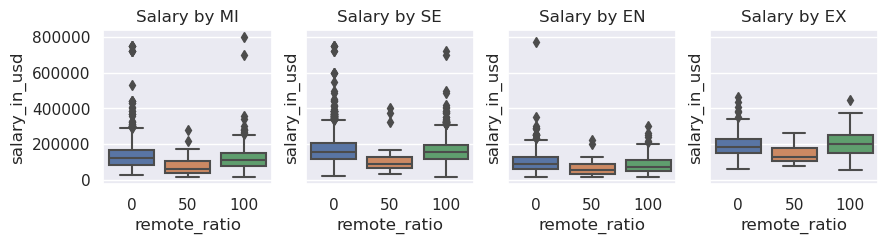

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

In [13]:
fig, axs = plt.subplots(1,4, figsize=(10,2), sharey=True)
for exp, ax in zip(df['experience_level'].unique(), axs.flatten()):
    fig = plt.figure(figsize=(3,4))
    temp = df.loc[df.experience_level == exp, ['remote_ratio','salary_in_usd']]
    sns.boxplot(data=temp, x='remote_ratio', y='salary_in_usd', ax=ax).set_title('Salary by '+exp)
    
plt.tight_layout()
plt.show()

In [14]:
## check if job prevalence is different between remote ratios which may cause the lower pay at hybrid work pattern
for rem, ax in zip(df['remote_ratio'].unique(), axs.flatten()):
    temp = df.loc[df.remote_ratio == rem, ['job_title']].value_counts(normalize=True)[:5]
    print(' remote ratio: {}'.format(rem), temp)

 remote ratio: 0 job_title                
Data Scientist               0.182235
Data Engineer                0.176703
Data Analyst                 0.133871
Machine Learning Engineer    0.094674
Research Scientist           0.036668
Name: proportion, dtype: float64
 remote ratio: 100 job_title                
Data Engineer                0.199699
Data Scientist               0.178012
Data Analyst                 0.148795
Machine Learning Engineer    0.094880
Analytics Engineer           0.049096
Name: proportion, dtype: float64
 remote ratio: 50 job_title                
Data Scientist               0.194805
Data Analyst                 0.084416
Data Engineer                0.058442
Machine Learning Engineer    0.058442
Business Data Analyst        0.032468
Name: proportion, dtype: float64


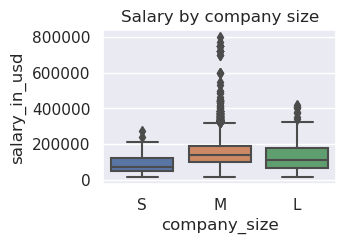

In [15]:
#Are there differences in salary based on company size or location?
## company size
sns.set_theme(rc={'figure.figsize': (3,2)})
sns.boxplot(df, x='company_size', y='salary_in_usd').set_title('Salary by company size');

In [16]:
#Two-Sample (independent) T-Test

m_sample = df.loc[df.company_size == 'M', 'salary_in_usd']
l_sample = df.loc[df.company_size == 'L', 'salary_in_usd']

t_test(a=['M',m_sample], b=['L',l_sample])

The independent t-score for M and L is 7.354186109063506 with a p-value of 2.076861917631644e-13


In [17]:
## location
df.company_location.unique(), df.company_location.unique().size

(array(['AU', 'US', 'GB', 'CA', 'NL', 'LT', 'DK', 'FR', 'ZA', 'NZ', 'AR',
        'ES', 'KE', 'LV', 'IN', 'DE', 'IL', 'FI', 'AT', 'BR', 'CH', 'AE',
        'PL', 'SA', 'UA', 'EG', 'PH', 'TR', 'OM', 'MX', 'PT', 'BA', 'IT',
        'AS', 'IE', 'EE', 'MT', 'HU', 'LB', 'RO', 'VN', 'NG', 'LU', 'GI',
        'CO', 'SI', 'GR', 'RU', 'KR', 'CZ', 'QA', 'GH', 'SE', 'AD', 'EC',
        'NO', 'JP', 'HK', 'CF', 'SG', 'TH', 'HR', 'AM', 'PK', 'IR', 'PR',
        'BE', 'ID', 'MY', 'DZ'], dtype=object),
 70)

In [18]:
df.company_location.value_counts(normalize=True)[:5]

company_location
US    0.839302
GB    0.053260
CA    0.039792
DE    0.008264
ES    0.006836
Name: proportion, dtype: float64

In [19]:
### ingoring countries with less than 1% dsta representation
location = df.loc[df.company_location.isin(['US','GB','CA','DE'])]
location.shape

(9219, 9)

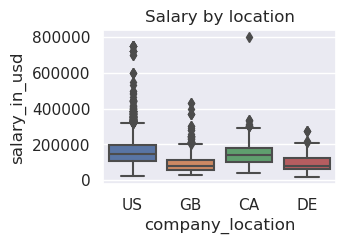

In [20]:
sns.boxplot(data=location, x='company_location', y='salary_in_usd').set_title('Salary by location');

In [21]:
us_sample = location.loc[location.company_location=='US', 'salary_in_usd']
gb_sample = location.loc[location.company_location=='GB', 'salary_in_usd']
ca_sample = location.loc[location.company_location=='CA', 'salary_in_usd']
de_sample = location.loc[location.company_location=='DE', 'salary_in_usd']

In [22]:
t_test(a=['USA', us_sample], b=['CA', ca_sample])
t_test(a=['CA', ca_sample], b=['UK', gb_sample])
t_test(a=['UK', gb_sample], b=['DE', de_sample])

The independent t-score for USA and CA is 3.2886546306989963 with a p-value of 0.0010107125747199598
The independent t-score for CA and UK is 11.406848647559611 with a p-value of 2.897303199198106e-28
The independent t-score for UK and DE is -0.2696018129394802 with a p-value of 0.7875591437895308


In [23]:
# How consistent are salaries across similar job titles?
## Most prevalent jobs:
filter = df.job_title.value_counts(normalize=True) > 0.01
job = df.job_title.value_counts(normalize=True).loc[filter]
job

job_title
Data Engineer                     0.182634
Data Scientist                    0.181002
Data Analyst                      0.138149
Machine Learning Engineer         0.094174
Analytics Engineer                0.036119
Research Scientist                0.031221
Data Architect                    0.028364
Research Engineer                 0.022243
Data Science                      0.021018
Business Intelligence Analyst     0.017549
ML Engineer                       0.016835
Applied Scientist                 0.014284
Research Analyst                  0.011529
Business Intelligence Engineer    0.011223
Data Manager                      0.010815
Machine Learning Scientist        0.010713
AI Engineer                       0.010509
Name: proportion, dtype: float64

In [24]:
job.index.size

17

In [25]:
jobsal = df.loc[df.job_title.isin(job.index), ['job_title','salary_in_usd']]
jobsal.shape

(8217, 2)

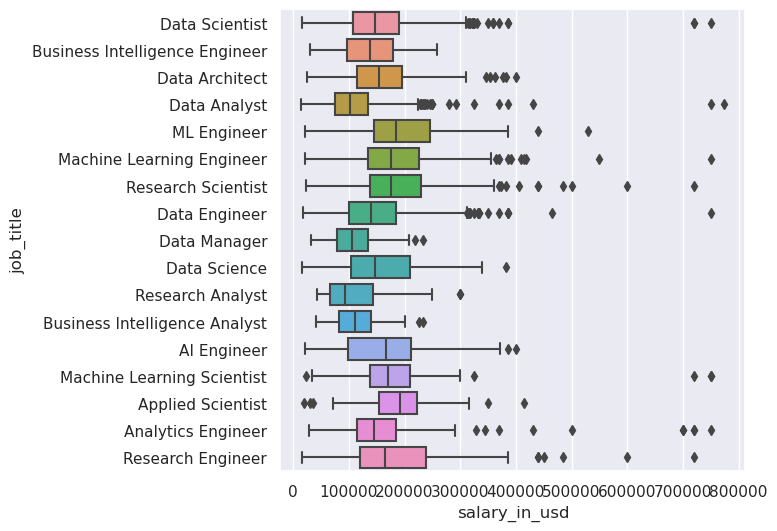

In [26]:
sns.set(rc={"figure.figsize":(6, 6)})
sns.boxplot(data=jobsal, y='job_title', x='salary_in_usd', orient='h');

In [27]:
#What is the variance in salaries within the same employment type and company size?
## what is the data distribution regarding employment type?
df.employment_type.value_counts()

employment_type
FT    9737
PT      32
CT      22
FL      10
Name: count, dtype: int64

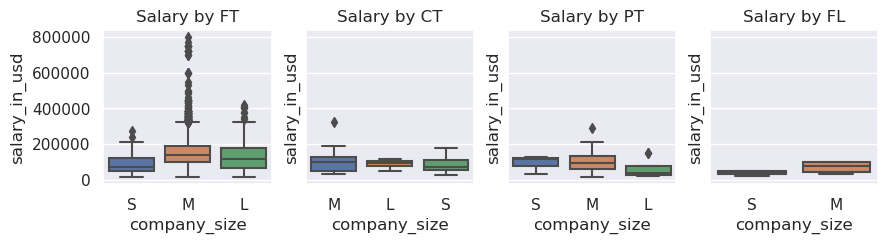

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

<Figure size 300x400 with 0 Axes>

In [28]:
fig, axs = plt.subplots(1,4, figsize=(10,2), sharey=True)
for com, ax in zip(df['employment_type'].unique(), axs.flatten()):
    fig = plt.figure(figsize=(3,4))
    temp = df.loc[df.employment_type == com, ['company_size','salary_in_usd']]
    sns.boxplot(data=temp, x='company_size', y='salary_in_usd', ax=ax).set_title('Salary by '+com)
    
plt.tight_layout()
plt.show()

In [29]:
#Which features most strongly influence salary distribution?

from sklearn.decomposition import PCA
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [30]:
dft = df.copy()
dft = dft.astype({'remote_ratio': 'object'})
dft.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
salary_in_usd          int64
dtype: object

In [31]:
trans = make_column_transformer((OrdinalEncoder(), df.columns[[1,2,3,4,5,6,7]]),
                                remainder='drop')

In [32]:
pipe = Pipeline([('encoder', trans),
                ('scaler', MinMaxScaler()),
                ('pca', PCA())], verbose=True)

In [33]:
result = pipe.fit(dft)

[Pipeline] ........... (step 1 of 3) Processing encoder, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing pca, total=   0.0s


In [44]:
pd.DataFrame(result.named_steps['pca'].components_, columns=df.columns[[1,2,3,4,5,6,7]]).abs().max()

experience_level      0.939578
employment_type       0.990454
job_title             0.992066
employee_residence    0.704667
remote_ratio          0.995418
company_location      0.696476
company_size          0.999403
dtype: float64